In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['trendyol-project', 'combined-data-trendyol']


In [2]:
combined = pd.read_csv('../input/combined-data-trendyol/combined_data.csv')
combined = combined.drop('Unnamed: 0', axis=1)
combined.head()

,productid,gender,color,categoryid,brandid,subcategoryid,price,soldquantity,stock,clickcount,favoredcount,week
0,2,1,476,938,603,83,827,1,60,10.0,0.0,3
1,2,1,476,938,603,83,827,0,59,0.0,0.0,3
2,2,1,476,938,603,83,827,0,60,1.0,0.0,3
3,2,1,476,938,603,83,827,0,60,1.0,0.0,3
4,15,2,476,407,1113,20,923,0,0,1.0,0.0,4


In [3]:
products = pd.read_csv('../input/trendyol-project/product.csv')
products.head()

,productid,gender,color,categoryid,brandid,subcategoryid,price
0,2,1,476,938,603,83,827
1,15,2,476,407,1113,20,923
2,21,2,1886,407,1113,20,1100
3,39,2,435,432,458,29,1851
4,43,2,476,407,458,20,1571


In [4]:
combined['week'].unique()

array([3, 4, 1, 0, 7, 5, 6, 8, 9, 2])

In [5]:
"""criteria = combined['week'] == 3
week3 = combined[criteria]
print(week3.shape)
week3.head()"""

"criteria = combined['week'] == 3\nweek3 = combined[criteria]\nprint(week3.shape)\nweek3.head()"

In [6]:
"""week3_group = week3.groupby('productid')['clickcount','favoredcount', 'soldquantity'].sum()
week3_group = week3_group.reset_index()
week3_group['heat'] = week3.groupby('productid')['soldquantity'].sum()/week3.groupby('productid')['stock'].mean()
week3_group = week3_group.fillna(0)
week3_group.head()"""

"week3_group = week3.groupby('productid')['clickcount','favoredcount', 'soldquantity'].sum()\nweek3_group = week3_group.reset_index()\nweek3_group['heat'] = week3.groupby('productid')['soldquantity'].sum()/week3.groupby('productid')['stock'].mean()\nweek3_group = week3_group.fillna(0)\nweek3_group.head()"

In [7]:
criteria9 = combined['week'] == 9 
week9 = combined[criteria9] #testy # sadece 9. hafta
first8 = combined[~criteria9] #testX # ilk 8 hafta

In [8]:
criteria8 = first8['week'] == 8
week8 = first8[criteria8] #trainy # sadece 8.hafta
train = first8[~criteria8] #trainX #ilk 7 hafta

In [9]:
train['week'].unique()

array([3, 4, 1, 0, 7, 5, 6, 2])

In [10]:
week9_group = week9.groupby('productid')['clickcount','favoredcount', 'soldquantity'].sum()
week9_group = week9_group.reset_index()
week9_group['heat'] = week9.groupby('productid')['soldquantity'].sum()/week9.groupby('productid')['stock'].mean()
week9_group = week9_group.fillna(0)
week9_group = week9_group.sort_values('productid')
week9_group.head()

,productid,clickcount,favoredcount,soldquantity,heat
0,9,30.0,0.0,0,0.0
1,12,10.0,0.0,0,0.0
2,14,16.0,0.0,0,0.0
3,21,21.0,2.0,0,0.0
4,25,10.0,1.0,0,0.0


In [11]:
week9_group = week9_group.merge(products, left_on='productid', right_on='productid')
week9_group = week9_group.sort_values(by='productid')
week9_group.head()

,productid,clickcount,favoredcount,soldquantity,heat,gender,color,categoryid,brandid,subcategoryid,price
0,9,30.0,0.0,0,0.0,2,5415,407,1113,20,1100
1,12,10.0,0.0,0,0.0,2,5409,407,1113,20,1421
2,14,16.0,0.0,0,0.0,2,3501,407,1113,20,923
3,21,21.0,2.0,0,0.0,2,1886,407,1113,20,1100
4,25,10.0,1.0,0,0.0,2,5409,407,1113,20,1268


In [12]:
week9_group.shape

(129702, 11)

In [13]:
week8_group = week8.groupby('productid')['clickcount','favoredcount', 'soldquantity'].sum()
week8_group = week8_group.reset_index()
week8_group['heat'] = week8.groupby('productid')['soldquantity'].sum()/week8.groupby('productid')['stock'].mean()
week8_group = week8_group.fillna(0)
week8_group = week8_group.sort_values('productid')
week8_group.head()

,productid,clickcount,favoredcount,soldquantity,heat
0,9,23.0,2.0,0,0.0
1,12,25.0,0.0,1,0.0
2,21,22.0,2.0,0,0.0
3,25,13.0,0.0,0,0.0
4,28,0.0,0.0,0,0.0


In [14]:
week8_group = week8_group.merge(products, left_on='productid', right_on='productid')
week8_group = week8_group.sort_values(by='productid')
week8_group.head()

,productid,clickcount,favoredcount,soldquantity,heat,gender,color,categoryid,brandid,subcategoryid,price
0,9,23.0,2.0,0,0.0,2,5415,407,1113,20,1100
1,12,25.0,0.0,1,0.0,2,5409,407,1113,20,1421
2,21,22.0,2.0,0,0.0,2,1886,407,1113,20,1100
3,25,13.0,0.0,0,0.0,2,5409,407,1113,20,1268
4,28,0.0,0.0,0,0.0,2,5825,407,1113,20,1268


In [15]:
week8_group.shape

(131691, 11)

**---------------prepare submission data-------------------------**

In [16]:
submission = pd.read_csv('../input/trendyol-project/SampleSubmission.csv')
submission.head()

,productid,sales
0,50,NaN
1,65,NaN
2,67,NaN
3,77,NaN
4,90,NaN


In [17]:
all_group = combined.groupby('productid')['clickcount','favoredcount', 'soldquantity'].sum()
all_group = all_group.reset_index()
all_group['heat'] = combined.groupby('productid')['soldquantity'].sum()/combined.groupby('productid')['stock'].mean()
all_group = all_group.fillna(0)
all_group = all_group.sort_values('productid')
all_group.head()

,productid,clickcount,favoredcount,soldquantity,heat
0,1,276.0,0.0,3,0.000000
1,2,12.0,0.0,1,0.017241
2,3,34.0,0.0,2,0.016736
3,4,282.0,0.0,7,0.016097
4,5,418.0,0.0,1,0.037787


In [18]:
all_dropped = all_group[all_group['productid'].isin(submission['productid'].tolist())]
print(submission.shape)
print(all_dropped.shape)
all_dropped.head()

(12810, 2)
(12810, 5)


,productid,clickcount,favoredcount,soldquantity,heat
46,50,8941.0,236.0,31,2.361905
60,65,768.0,23.0,2,1.418182
62,67,3277.0,98.0,14,1.856905
72,77,23309.0,219.0,32,0.196319
84,90,8169.0,56.0,12,0.941176


In [19]:
all_dropped = all_dropped.fillna(0)
all_dropped.isna().sum()

productid       0
clickcount      0
favoredcount    0
soldquantity    0
heat            0
dtype: int64

**----------CREATING TEST DATA-------------**

In [20]:
test_group = first8.groupby('productid')['clickcount','favoredcount', 'soldquantity'].sum()
test_group = test_group.reset_index()
test_group['heat'] = first8.groupby('productid')['soldquantity'].sum()/first8.groupby('productid')['stock'].mean()
test_group = test_group.fillna(0)
test_group.head()

,productid,clickcount,favoredcount,soldquantity,heat
0,1,276.0,0.0,3,0.000000
1,2,12.0,0.0,1,0.017241
2,3,34.0,0.0,2,0.016736
3,4,282.0,0.0,7,0.016097
4,5,418.0,0.0,1,0.037787


In [21]:
test_group = test_group.merge(products, left_on='productid', right_on='productid')
test_group.head()

,productid,clickcount,favoredcount,soldquantity,heat,gender,color,categoryid,brandid,subcategoryid,price
0,1,276.0,0.0,3,0.000000,1,1328,407,603,20,1996
1,2,12.0,0.0,1,0.017241,1,476,938,603,83,827
2,3,34.0,0.0,2,0.016736,1,440,938,603,83,956
3,4,282.0,0.0,7,0.016097,1,447,407,603,20,1927
4,5,418.0,0.0,1,0.037787,2,5415,407,1113,20,1268


In [22]:
test_group = test_group.drop(columns=['gender','color','categoryid',
                                       'brandid', 'subcategoryid',
                                       'price'])

In [23]:
week9_group = week9_group.drop(columns=['gender','color','categoryid',
                                       'brandid', 'subcategoryid',
                                       'price'])

In [24]:
week9_dropped = week9_group[week9_group['productid'].isin(test_group['productid'].tolist())] #sadece 9.haftada satilan... 
week9_dropped = week9_dropped.sort_values(by='productid')                   #...ürünleri dropla

In [25]:
#ilk 8 haftada satılıp 9da satılmayanları bul
notsold_week9 = test_group[np.logical_not(test_group['productid'].isin(week9_dropped['productid'].tolist()))]
#bunların solquantitylerini 0 yap
notsold_week9['soldquantity'] = 0
week9_dropped_added = week9_dropped.append(notsold_week9)
week9_dropped_added = week9_dropped_added.sort_values(by='productid')
print(week9_dropped_added.shape) # testy
print(test_group.shape) #testX
week9_dropped_added.head()

(192658, 5)
(192658, 5)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,productid,clickcount,favoredcount,soldquantity,heat
0,1,276.0,0.0,0,0.000000
1,2,12.0,0.0,0,0.017241
2,3,34.0,0.0,0,0.016736
3,4,282.0,0.0,0,0.016097
4,5,418.0,0.0,0,0.037787


In [26]:
test_X = test_group
test_y = week9_dropped_added['soldquantity']
test_X.head()

,productid,clickcount,favoredcount,soldquantity,heat
0,1,276.0,0.0,3,0.000000
1,2,12.0,0.0,1,0.017241
2,3,34.0,0.0,2,0.016736
3,4,282.0,0.0,7,0.016097
4,5,418.0,0.0,1,0.037787


testX= test_X
>
testy = test_y

**-------------------CREATING TRAIN DATA------------------------**

In [27]:
train_group = train.groupby('productid')['clickcount','favoredcount', 'soldquantity'].sum()
train_group = train_group.reset_index()
train_group['heat'] = train.groupby('productid')['soldquantity'].sum()/train.groupby('productid')['stock'].mean()
train_group = train_group.fillna(0)
train_group.head()

,productid,clickcount,favoredcount,soldquantity,heat
0,1,276.0,0.0,3,0.000000
1,2,12.0,0.0,1,0.017241
2,3,34.0,0.0,2,0.016736
3,4,282.0,0.0,7,0.016097
4,5,418.0,0.0,1,0.037787


In [28]:
train_group = train_group.merge(products, left_on='productid', right_on='productid')
train_group.head()

,productid,clickcount,favoredcount,soldquantity,heat,gender,color,categoryid,brandid,subcategoryid,price
0,1,276.0,0.0,3,0.000000,1,1328,407,603,20,1996
1,2,12.0,0.0,1,0.017241,1,476,938,603,83,827
2,3,34.0,0.0,2,0.016736,1,440,938,603,83,956
3,4,282.0,0.0,7,0.016097,1,447,407,603,20,1927
4,5,418.0,0.0,1,0.037787,2,5415,407,1113,20,1268


In [29]:
train_group = train_group.drop(columns=['gender','color','categoryid',
                                       'brandid', 'subcategoryid',
                                       'price'])

In [30]:
week8_group = week8_group.drop(columns=['gender','color','categoryid',
                                       'brandid', 'subcategoryid',
                                       'price'])

In [31]:
week8_dropped = week8_group[week8_group['productid'].isin(train_group['productid'].tolist())] #sadece 8.haftada satilan... 
week8_dropped = week8_dropped.sort_values(by='productid')                   #...ürünleri dropla
print(week8_dropped.shape)
print(train_group.shape)
week8_dropped.head()

(129397, 5)
(190364, 5)


,productid,clickcount,favoredcount,soldquantity,heat
0,9,23.0,2.0,0,0.0
1,12,25.0,0.0,1,0.0
2,21,22.0,2.0,0,0.0
3,25,13.0,0.0,0,0.0
4,28,0.0,0.0,0,0.0


In [32]:
#train_y = week8_dropped['soldquantity'] #8. haftanin satilanlari
train_X = train_group# ilk 7 haftanin verisi
train_X.head()

,productid,clickcount,favoredcount,soldquantity,heat
0,1,276.0,0.0,3,0.000000
1,2,12.0,0.0,1,0.017241
2,3,34.0,0.0,2,0.016736
3,4,282.0,0.0,7,0.016097
4,5,418.0,0.0,1,0.037787


In [33]:
# ilk 7 haftada satılıp 8de satılmayanları bul
notsold_week8 = train_group[np.logical_not(train_group['productid'].isin(week8_dropped['productid'].tolist()))]
#bunların solquantitylerini 0 yap
notsold_week8['soldquantity'] = 0
week8_added = week8_dropped.append(notsold_week8)
week8_added = week8_added.sort_values(by='productid')
print(train_X.shape) 
print(week8_added.shape)
train_X.head()

(190364, 5)
(190364, 5)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,productid,clickcount,favoredcount,soldquantity,heat
0,1,276.0,0.0,3,0.000000
1,2,12.0,0.0,1,0.017241
2,3,34.0,0.0,2,0.016736
3,4,282.0,0.0,7,0.016097
4,5,418.0,0.0,1,0.037787


In [34]:
train_y = week8_added['soldquantity']
train_y.head()

0    0
1    0
2    0
3    0
4    0
Name: soldquantity, dtype: int64

In [35]:
target_added = train_X
target_added = target_added.assign(target = pd.Series(train_y.values))
target_added.head()

,productid,clickcount,favoredcount,soldquantity,heat,target
0,1,276.0,0.0,3,0.000000,0
1,2,12.0,0.0,1,0.017241,0
2,3,34.0,0.0,2,0.016736,0
3,4,282.0,0.0,7,0.016097,0
4,5,418.0,0.0,1,0.037787,0


trainy = train_y
>
trainX = train_X

**--------------------EXAMINE CORRELATIONS--------------------------**

In [36]:
correlations = target_added.corr()['target'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 heat            0.004248
productid       0.073044
clickcount      0.468425
favoredcount    0.475159
soldquantity    0.530820
target          1.000000
Name: target, dtype: float64

Most Negative Correlations:
 heat            0.004248
productid       0.073044
clickcount      0.468425
favoredcount    0.475159
soldquantity    0.530820
target          1.000000
Name: target, dtype: float64


In [37]:
counts = target_added[['clickcount', 'favoredcount','soldquantity','target']]
counts_corr = counts.corr()
counts_corr

,clickcount,favoredcount,soldquantity,target
clickcount,1.000000,0.824711,0.830696,0.468425
favoredcount,0.824711,1.000000,0.695182,0.475159
soldquantity,0.830696,0.695182,1.000000,0.530820
target,0.468425,0.475159,0.530820,1.000000


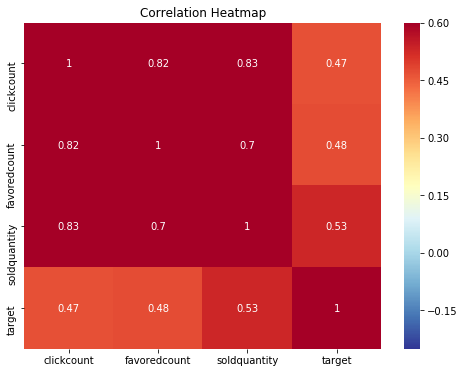

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(counts_corr, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

**--------------CREATE POLYNAMIAL FEATURES---------------------**

In [39]:
from sklearn.preprocessing import PolynomialFeatures

poly_transformer = PolynomialFeatures(degree = 3)

poly_features = train_X[['clickcount', 'favoredcount','soldquantity']]
poly_features_test = test_X[['clickcount', 'favoredcount','soldquantity']]
poly_features_all = all_dropped[['clickcount','favoredcount','soldquantity']]

poly_transformer.fit(poly_features)

poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
poly_features_all = poly_transformer.transform(poly_features_all)

print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (190364, 20)


In [40]:
poly_features = pd.DataFrame(poly_features, columns = poly_transformer.get_feature_names(['clickcount', 'favoredcount','soldquantity']))
poly_features_test = pd.DataFrame(poly_features_test, columns = poly_transformer.get_feature_names(['clickcount', 'favoredcount','soldquantity']))
poly_features_all = pd.DataFrame(poly_features_all, columns = poly_transformer.get_feature_names(['clickcount', 'favoredcount','soldquantity']))

poly_features['target'] = target_added['target']

poly_corrs = poly_features.corr()['target'].sort_values()
print('best: ',poly_corrs.head(5))
print('last', poly_corrs.tail(5))
poly_features.head()

best:  soldquantity^3                 0.240611
clickcount soldquantity^2      0.262487
favoredcount soldquantity^2    0.262702
favoredcount^3                 0.278619
clickcount^2 soldquantity      0.289205
Name: target, dtype: float64
last clickcount      0.468425
favoredcount    0.475159
soldquantity    0.530820
target          1.000000
1                    NaN
Name: target, dtype: float64


,1,clickcount,favoredcount,soldquantity,clickcount^2,clickcount favoredcount,clickcount soldquantity,favoredcount^2,favoredcount soldquantity,soldquantity^2,clickcount^3,clickcount^2 favoredcount,clickcount^2 soldquantity,clickcount favoredcount^2,clickcount favoredcount soldquantity,clickcount soldquantity^2,favoredcount^3,favoredcount^2 soldquantity,favoredcount soldquantity^2,soldquantity^3,target
0,1.0,276.0,0.0,3.0,76176.0,0.0,828.0,0.0,0.0,9.0,21024576.0,0.0,228528.0,0.0,0.0,2484.0,0.0,0.0,0.0,27.0,0
1,1.0,12.0,0.0,1.0,144.0,0.0,12.0,0.0,0.0,1.0,1728.0,0.0,144.0,0.0,0.0,12.0,0.0,0.0,0.0,1.0,0
2,1.0,34.0,0.0,2.0,1156.0,0.0,68.0,0.0,0.0,4.0,39304.0,0.0,2312.0,0.0,0.0,136.0,0.0,0.0,0.0,8.0,0
3,1.0,282.0,0.0,7.0,79524.0,0.0,1974.0,0.0,0.0,49.0,22425768.0,0.0,556668.0,0.0,0.0,13818.0,0.0,0.0,0.0,343.0,0
4,1.0,418.0,0.0,1.0,174724.0,0.0,418.0,0.0,0.0,1.0,73034632.0,0.0,174724.0,0.0,0.0,418.0,0.0,0.0,0.0,1.0,0


In [41]:
poly_features = poly_features.drop('1',axis=1)
poly_features.head()

,clickcount,favoredcount,soldquantity,clickcount^2,clickcount favoredcount,clickcount soldquantity,favoredcount^2,favoredcount soldquantity,soldquantity^2,clickcount^3,clickcount^2 favoredcount,clickcount^2 soldquantity,clickcount favoredcount^2,clickcount favoredcount soldquantity,clickcount soldquantity^2,favoredcount^3,favoredcount^2 soldquantity,favoredcount soldquantity^2,soldquantity^3,target
0,276.0,0.0,3.0,76176.0,0.0,828.0,0.0,0.0,9.0,21024576.0,0.0,228528.0,0.0,0.0,2484.0,0.0,0.0,0.0,27.0,0
1,12.0,0.0,1.0,144.0,0.0,12.0,0.0,0.0,1.0,1728.0,0.0,144.0,0.0,0.0,12.0,0.0,0.0,0.0,1.0,0
2,34.0,0.0,2.0,1156.0,0.0,68.0,0.0,0.0,4.0,39304.0,0.0,2312.0,0.0,0.0,136.0,0.0,0.0,0.0,8.0,0
3,282.0,0.0,7.0,79524.0,0.0,1974.0,0.0,0.0,49.0,22425768.0,0.0,556668.0,0.0,0.0,13818.0,0.0,0.0,0.0,343.0,0
4,418.0,0.0,1.0,174724.0,0.0,418.0,0.0,0.0,1.0,73034632.0,0.0,174724.0,0.0,0.0,418.0,0.0,0.0,0.0,1.0,0


In [42]:
poly_features_test = poly_features_test.drop('1',axis=1)
poly_features_test.head()

,clickcount,favoredcount,soldquantity,clickcount^2,clickcount favoredcount,clickcount soldquantity,favoredcount^2,favoredcount soldquantity,soldquantity^2,clickcount^3,clickcount^2 favoredcount,clickcount^2 soldquantity,clickcount favoredcount^2,clickcount favoredcount soldquantity,clickcount soldquantity^2,favoredcount^3,favoredcount^2 soldquantity,favoredcount soldquantity^2,soldquantity^3
0,276.0,0.0,3.0,76176.0,0.0,828.0,0.0,0.0,9.0,21024576.0,0.0,228528.0,0.0,0.0,2484.0,0.0,0.0,0.0,27.0
1,12.0,0.0,1.0,144.0,0.0,12.0,0.0,0.0,1.0,1728.0,0.0,144.0,0.0,0.0,12.0,0.0,0.0,0.0,1.0
2,34.0,0.0,2.0,1156.0,0.0,68.0,0.0,0.0,4.0,39304.0,0.0,2312.0,0.0,0.0,136.0,0.0,0.0,0.0,8.0
3,282.0,0.0,7.0,79524.0,0.0,1974.0,0.0,0.0,49.0,22425768.0,0.0,556668.0,0.0,0.0,13818.0,0.0,0.0,0.0,343.0
4,418.0,0.0,1.0,174724.0,0.0,418.0,0.0,0.0,1.0,73034632.0,0.0,174724.0,0.0,0.0,418.0,0.0,0.0,0.0,1.0


In [43]:
poly_features_all = poly_features_all.drop('1',axis=1)
poly_features_all.head()

,clickcount,favoredcount,soldquantity,clickcount^2,clickcount favoredcount,clickcount soldquantity,favoredcount^2,favoredcount soldquantity,soldquantity^2,clickcount^3,clickcount^2 favoredcount,clickcount^2 soldquantity,clickcount favoredcount^2,clickcount favoredcount soldquantity,clickcount soldquantity^2,favoredcount^3,favoredcount^2 soldquantity,favoredcount soldquantity^2,soldquantity^3
0,8941.0,236.0,31.0,79941481.0,2110076.0,277171.0,55696.0,7316.0,961.0,7.147568e+11,1.886619e+10,2.478186e+09,4.979779e+08,65412356.0,8592301.0,13144256.0,1726576.0,226796.0,29791.0
1,768.0,23.0,2.0,589824.0,17664.0,1536.0,529.0,46.0,4.0,4.529848e+08,1.356595e+07,1.179648e+06,4.062720e+05,35328.0,3072.0,12167.0,1058.0,92.0,8.0
2,3277.0,98.0,14.0,10738729.0,321146.0,45878.0,9604.0,1372.0,196.0,3.519081e+10,1.052395e+09,1.503422e+08,3.147231e+07,4496044.0,642292.0,941192.0,134456.0,19208.0,2744.0
3,23309.0,219.0,32.0,543309481.0,5104671.0,745888.0,47961.0,7008.0,1024.0,1.266400e+13,1.189848e+11,1.738590e+10,1.117923e+09,163349472.0,23868416.0,10503459.0,1534752.0,224256.0,32768.0
4,8169.0,56.0,12.0,66732561.0,457464.0,98028.0,3136.0,672.0,144.0,5.451383e+11,3.737023e+09,8.007907e+08,2.561798e+07,5489568.0,1176336.0,175616.0,37632.0,8064.0,1728.0


**--------------------ADD POLYNAMIAL FEATURES TO TRAIN DATA------------**

In [44]:
poly_features['productid'] = target_added['productid']
poly_features.head()

,clickcount,favoredcount,soldquantity,clickcount^2,clickcount favoredcount,clickcount soldquantity,favoredcount^2,favoredcount soldquantity,soldquantity^2,clickcount^3,clickcount^2 favoredcount,clickcount^2 soldquantity,clickcount favoredcount^2,clickcount favoredcount soldquantity,clickcount soldquantity^2,favoredcount^3,favoredcount^2 soldquantity,favoredcount soldquantity^2,soldquantity^3,target,productid
0,276.0,0.0,3.0,76176.0,0.0,828.0,0.0,0.0,9.0,21024576.0,0.0,228528.0,0.0,0.0,2484.0,0.0,0.0,0.0,27.0,0,1
1,12.0,0.0,1.0,144.0,0.0,12.0,0.0,0.0,1.0,1728.0,0.0,144.0,0.0,0.0,12.0,0.0,0.0,0.0,1.0,0,2
2,34.0,0.0,2.0,1156.0,0.0,68.0,0.0,0.0,4.0,39304.0,0.0,2312.0,0.0,0.0,136.0,0.0,0.0,0.0,8.0,0,3
3,282.0,0.0,7.0,79524.0,0.0,1974.0,0.0,0.0,49.0,22425768.0,0.0,556668.0,0.0,0.0,13818.0,0.0,0.0,0.0,343.0,0,4
4,418.0,0.0,1.0,174724.0,0.0,418.0,0.0,0.0,1.0,73034632.0,0.0,174724.0,0.0,0.0,418.0,0.0,0.0,0.0,1.0,0,5


In [45]:
poly_features = poly_features.drop(columns = ['clickcount', 'favoredcount', 'soldquantity','target'])
poly_features.head()

,clickcount^2,clickcount favoredcount,clickcount soldquantity,favoredcount^2,favoredcount soldquantity,soldquantity^2,clickcount^3,clickcount^2 favoredcount,clickcount^2 soldquantity,clickcount favoredcount^2,clickcount favoredcount soldquantity,clickcount soldquantity^2,favoredcount^3,favoredcount^2 soldquantity,favoredcount soldquantity^2,soldquantity^3,productid
0,76176.0,0.0,828.0,0.0,0.0,9.0,21024576.0,0.0,228528.0,0.0,0.0,2484.0,0.0,0.0,0.0,27.0,1
1,144.0,0.0,12.0,0.0,0.0,1.0,1728.0,0.0,144.0,0.0,0.0,12.0,0.0,0.0,0.0,1.0,2
2,1156.0,0.0,68.0,0.0,0.0,4.0,39304.0,0.0,2312.0,0.0,0.0,136.0,0.0,0.0,0.0,8.0,3
3,79524.0,0.0,1974.0,0.0,0.0,49.0,22425768.0,0.0,556668.0,0.0,0.0,13818.0,0.0,0.0,0.0,343.0,4
4,174724.0,0.0,418.0,0.0,0.0,1.0,73034632.0,0.0,174724.0,0.0,0.0,418.0,0.0,0.0,0.0,1.0,5


In [46]:
train_X_poly = train_group.merge(poly_features, on = 'productid', how ='left')
train_X_poly.head()

,productid,clickcount,favoredcount,soldquantity,heat,clickcount^2,clickcount favoredcount,clickcount soldquantity,favoredcount^2,favoredcount soldquantity,soldquantity^2,clickcount^3,clickcount^2 favoredcount,clickcount^2 soldquantity,clickcount favoredcount^2,clickcount favoredcount soldquantity,clickcount soldquantity^2,favoredcount^3,favoredcount^2 soldquantity,favoredcount soldquantity^2,soldquantity^3
0,1,276.0,0.0,3,0.000000,76176.0,0.0,828.0,0.0,0.0,9.0,21024576.0,0.0,228528.0,0.0,0.0,2484.0,0.0,0.0,0.0,27.0
1,2,12.0,0.0,1,0.017241,144.0,0.0,12.0,0.0,0.0,1.0,1728.0,0.0,144.0,0.0,0.0,12.0,0.0,0.0,0.0,1.0
2,3,34.0,0.0,2,0.016736,1156.0,0.0,68.0,0.0,0.0,4.0,39304.0,0.0,2312.0,0.0,0.0,136.0,0.0,0.0,0.0,8.0
3,4,282.0,0.0,7,0.016097,79524.0,0.0,1974.0,0.0,0.0,49.0,22425768.0,0.0,556668.0,0.0,0.0,13818.0,0.0,0.0,0.0,343.0
4,5,418.0,0.0,1,0.037787,174724.0,0.0,418.0,0.0,0.0,1.0,73034632.0,0.0,174724.0,0.0,0.0,418.0,0.0,0.0,0.0,1.0


**---------------------ADD POLYNAMIAL FEATURES TO TEST DATA-------------------**

In [47]:
poly_features_test['productid'] = test_X['productid']
poly_features_test.head()

,clickcount,favoredcount,soldquantity,clickcount^2,clickcount favoredcount,clickcount soldquantity,favoredcount^2,favoredcount soldquantity,soldquantity^2,clickcount^3,clickcount^2 favoredcount,clickcount^2 soldquantity,clickcount favoredcount^2,clickcount favoredcount soldquantity,clickcount soldquantity^2,favoredcount^3,favoredcount^2 soldquantity,favoredcount soldquantity^2,soldquantity^3,productid
0,276.0,0.0,3.0,76176.0,0.0,828.0,0.0,0.0,9.0,21024576.0,0.0,228528.0,0.0,0.0,2484.0,0.0,0.0,0.0,27.0,1
1,12.0,0.0,1.0,144.0,0.0,12.0,0.0,0.0,1.0,1728.0,0.0,144.0,0.0,0.0,12.0,0.0,0.0,0.0,1.0,2
2,34.0,0.0,2.0,1156.0,0.0,68.0,0.0,0.0,4.0,39304.0,0.0,2312.0,0.0,0.0,136.0,0.0,0.0,0.0,8.0,3
3,282.0,0.0,7.0,79524.0,0.0,1974.0,0.0,0.0,49.0,22425768.0,0.0,556668.0,0.0,0.0,13818.0,0.0,0.0,0.0,343.0,4
4,418.0,0.0,1.0,174724.0,0.0,418.0,0.0,0.0,1.0,73034632.0,0.0,174724.0,0.0,0.0,418.0,0.0,0.0,0.0,1.0,5


In [48]:
poly_features_test = poly_features_test.drop(columns = ['clickcount', 'favoredcount','soldquantity'])
poly_features_test.head()

,clickcount^2,clickcount favoredcount,clickcount soldquantity,favoredcount^2,favoredcount soldquantity,soldquantity^2,clickcount^3,clickcount^2 favoredcount,clickcount^2 soldquantity,clickcount favoredcount^2,clickcount favoredcount soldquantity,clickcount soldquantity^2,favoredcount^3,favoredcount^2 soldquantity,favoredcount soldquantity^2,soldquantity^3,productid
0,76176.0,0.0,828.0,0.0,0.0,9.0,21024576.0,0.0,228528.0,0.0,0.0,2484.0,0.0,0.0,0.0,27.0,1
1,144.0,0.0,12.0,0.0,0.0,1.0,1728.0,0.0,144.0,0.0,0.0,12.0,0.0,0.0,0.0,1.0,2
2,1156.0,0.0,68.0,0.0,0.0,4.0,39304.0,0.0,2312.0,0.0,0.0,136.0,0.0,0.0,0.0,8.0,3
3,79524.0,0.0,1974.0,0.0,0.0,49.0,22425768.0,0.0,556668.0,0.0,0.0,13818.0,0.0,0.0,0.0,343.0,4
4,174724.0,0.0,418.0,0.0,0.0,1.0,73034632.0,0.0,174724.0,0.0,0.0,418.0,0.0,0.0,0.0,1.0,5


In [49]:
test_X_poly = test_X.merge(poly_features_test, on = 'productid', how ='left')
test_X_poly.head()

,productid,clickcount,favoredcount,soldquantity,heat,clickcount^2,clickcount favoredcount,clickcount soldquantity,favoredcount^2,favoredcount soldquantity,soldquantity^2,clickcount^3,clickcount^2 favoredcount,clickcount^2 soldquantity,clickcount favoredcount^2,clickcount favoredcount soldquantity,clickcount soldquantity^2,favoredcount^3,favoredcount^2 soldquantity,favoredcount soldquantity^2,soldquantity^3
0,1,276.0,0.0,3,0.000000,76176.0,0.0,828.0,0.0,0.0,9.0,21024576.0,0.0,228528.0,0.0,0.0,2484.0,0.0,0.0,0.0,27.0
1,2,12.0,0.0,1,0.017241,144.0,0.0,12.0,0.0,0.0,1.0,1728.0,0.0,144.0,0.0,0.0,12.0,0.0,0.0,0.0,1.0
2,3,34.0,0.0,2,0.016736,1156.0,0.0,68.0,0.0,0.0,4.0,39304.0,0.0,2312.0,0.0,0.0,136.0,0.0,0.0,0.0,8.0
3,4,282.0,0.0,7,0.016097,79524.0,0.0,1974.0,0.0,0.0,49.0,22425768.0,0.0,556668.0,0.0,0.0,13818.0,0.0,0.0,0.0,343.0
4,5,418.0,0.0,1,0.037787,174724.0,0.0,418.0,0.0,0.0,1.0,73034632.0,0.0,174724.0,0.0,0.0,418.0,0.0,0.0,0.0,1.0


**--------------------add poly features to submission data-----------------------**

In [50]:
poly_features_all['productid'] = all_dropped['productid']
poly_features_all.head()

,clickcount,favoredcount,soldquantity,clickcount^2,clickcount favoredcount,clickcount soldquantity,favoredcount^2,favoredcount soldquantity,soldquantity^2,clickcount^3,clickcount^2 favoredcount,clickcount^2 soldquantity,clickcount favoredcount^2,clickcount favoredcount soldquantity,clickcount soldquantity^2,favoredcount^3,favoredcount^2 soldquantity,favoredcount soldquantity^2,soldquantity^3,productid
0,8941.0,236.0,31.0,79941481.0,2110076.0,277171.0,55696.0,7316.0,961.0,7.147568e+11,1.886619e+10,2.478186e+09,4.979779e+08,65412356.0,8592301.0,13144256.0,1726576.0,226796.0,29791.0,NaN
1,768.0,23.0,2.0,589824.0,17664.0,1536.0,529.0,46.0,4.0,4.529848e+08,1.356595e+07,1.179648e+06,4.062720e+05,35328.0,3072.0,12167.0,1058.0,92.0,8.0,NaN
2,3277.0,98.0,14.0,10738729.0,321146.0,45878.0,9604.0,1372.0,196.0,3.519081e+10,1.052395e+09,1.503422e+08,3.147231e+07,4496044.0,642292.0,941192.0,134456.0,19208.0,2744.0,NaN
3,23309.0,219.0,32.0,543309481.0,5104671.0,745888.0,47961.0,7008.0,1024.0,1.266400e+13,1.189848e+11,1.738590e+10,1.117923e+09,163349472.0,23868416.0,10503459.0,1534752.0,224256.0,32768.0,NaN
4,8169.0,56.0,12.0,66732561.0,457464.0,98028.0,3136.0,672.0,144.0,5.451383e+11,3.737023e+09,8.007907e+08,2.561798e+07,5489568.0,1176336.0,175616.0,37632.0,8064.0,1728.0,NaN


In [51]:
poly_features_all = poly_features_all.drop(columns = ['clickcount', 'favoredcount','soldquantity'])
poly_features_all.head()

,clickcount^2,clickcount favoredcount,clickcount soldquantity,favoredcount^2,favoredcount soldquantity,soldquantity^2,clickcount^3,clickcount^2 favoredcount,clickcount^2 soldquantity,clickcount favoredcount^2,clickcount favoredcount soldquantity,clickcount soldquantity^2,favoredcount^3,favoredcount^2 soldquantity,favoredcount soldquantity^2,soldquantity^3,productid
0,79941481.0,2110076.0,277171.0,55696.0,7316.0,961.0,7.147568e+11,1.886619e+10,2.478186e+09,4.979779e+08,65412356.0,8592301.0,13144256.0,1726576.0,226796.0,29791.0,NaN
1,589824.0,17664.0,1536.0,529.0,46.0,4.0,4.529848e+08,1.356595e+07,1.179648e+06,4.062720e+05,35328.0,3072.0,12167.0,1058.0,92.0,8.0,NaN
2,10738729.0,321146.0,45878.0,9604.0,1372.0,196.0,3.519081e+10,1.052395e+09,1.503422e+08,3.147231e+07,4496044.0,642292.0,941192.0,134456.0,19208.0,2744.0,NaN
3,543309481.0,5104671.0,745888.0,47961.0,7008.0,1024.0,1.266400e+13,1.189848e+11,1.738590e+10,1.117923e+09,163349472.0,23868416.0,10503459.0,1534752.0,224256.0,32768.0,NaN
4,66732561.0,457464.0,98028.0,3136.0,672.0,144.0,5.451383e+11,3.737023e+09,8.007907e+08,2.561798e+07,5489568.0,1176336.0,175616.0,37632.0,8064.0,1728.0,NaN


In [52]:
all_dropped = all_dropped.merge(poly_features_test, on = 'productid', how ='left')
all_dropped.head()

,productid,clickcount,favoredcount,soldquantity,heat,clickcount^2,clickcount favoredcount,clickcount soldquantity,favoredcount^2,favoredcount soldquantity,soldquantity^2,clickcount^3,clickcount^2 favoredcount,clickcount^2 soldquantity,clickcount favoredcount^2,clickcount favoredcount soldquantity,clickcount soldquantity^2,favoredcount^3,favoredcount^2 soldquantity,favoredcount soldquantity^2,soldquantity^3
0,50,8941.0,236.0,31,2.361905,65092624.0,1662008.0,209768.0,42436.0,5356.0,676.0,5.251673e+11,1.340908e+10,1.692408e+09,3.423736e+08,43212208.0,5453968.0,8741816.0,1103336.0,139256.0,17576.0
1,65,768.0,23.0,2,1.418182,555025.0,17135.0,1490.0,529.0,46.0,4.0,4.134936e+08,1.276558e+07,1.110050e+06,3.941050e+05,34270.0,2980.0,12167.0,1058.0,92.0,8.0
2,67,3277.0,98.0,14,1.856905,5827396.0,166566.0,26554.0,4761.0,759.0,121.0,1.406733e+10,4.020903e+08,6.410136e+07,1.149305e+07,1832226.0,292094.0,328509.0,52371.0,8349.0,1331.0
3,77,23309.0,219.0,32,0.196319,528264256.0,4918576.0,712504.0,45796.0,6634.0,961.0,1.214163e+13,1.130486e+11,1.637619e+10,1.052575e+09,152475856.0,22087624.0,9800344.0,1419676.0,205654.0,29791.0
4,90,8169.0,56.0,12,0.941176,55815841.0,366079.0,89652.0,2401.0,588.0,144.0,4.170001e+11,2.734976e+09,6.697901e+08,1.793787e+07,4392948.0,1075824.0,117649.0,28812.0,7056.0,1728.0


**--------------------TRAIN MODEL------------------------**
> 
*train data X : train_X_poly*
>
*train data Y : train_y*
>
*test data X : test_X_poly*
>
*test data Y : test_y*
> 


In [53]:
train_X_poly = train_X_poly.drop('productid',axis=1)
test_X_poly = test_X_poly.drop('productid',axis=1)
all_dropped = all_dropped.drop('productid',axis=1)

In [54]:
import sklearn as sk
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standarized_train = scaler.fit(train_X_poly).transform(train_X_poly)
standarized_train


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


array([[-0.2758396 , -0.27438652, -0.22478795, ..., -0.01200808,
        -0.00833949, -0.00784162],
       [-0.304292  , -0.27438652, -0.24985267, ..., -0.01200808,
        -0.00833949, -0.00784163],
       [-0.30192097, -0.27438652, -0.23732031, ..., -0.01200808,
        -0.00833949, -0.00784163],
       ...,
       [-0.30558529, -0.27438652, -0.14959378, ..., -0.01200808,
        -0.00833949, -0.00784122],
       [-0.30558529, -0.27438652, -0.22478795, ..., -0.01200808,
        -0.00833949, -0.00784162],
       [-0.30558529, -0.27438652, -0.09946434, ..., -0.01200808,
        -0.00833949, -0.0078404 ]])

In [55]:
stand_test = scaler.transform(test_X_poly)
stand_test

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[-0.2758396 , -0.27438652, -0.22478795, ..., -0.01200808,
        -0.00833949, -0.00784162],
       [-0.304292  , -0.27438652, -0.24985267, ..., -0.01200808,
        -0.00833949, -0.00784163],
       [-0.30192097, -0.27438652, -0.23732031, ..., -0.01200808,
        -0.00833949, -0.00784163],
       ...,
       [-0.30558529, -0.27438652, -0.14959378, ..., -0.01200808,
        -0.00833949, -0.00784122],
       [-0.30558529, -0.27438652, -0.22478795, ..., -0.01200808,
        -0.00833949, -0.00784162],
       [-0.30558529, -0.27438652, -0.09946434, ..., -0.01200808,
        -0.00833949, -0.0078404 ]])

In [69]:
all_dropped = all_dropped.fillna(0)
all_scale = scaler.transform(all_dropped)
all_scale

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


array([[ 0.65802435,  0.74036869,  0.12611816, ..., -0.01175757,
        -0.0082875 , -0.00783176],
       [-0.22281466, -0.17549089, -0.23732031, ..., -0.01200784,
        -0.00833945, -0.00784163],
       [ 0.04759095,  0.14699488, -0.08693198, ..., -0.01199619,
        -0.00833637, -0.00784088],
       ...,
       [-0.29599339, -0.2657869 , -0.22478795, ..., -0.01200808,
        -0.00833949, -0.00784163],
       [-0.29890329, -0.26148709, -0.24985267, ..., -0.01200808,
        -0.00833949, -0.00784163],
       [-0.22906557, -0.20988937, -0.19972323, ..., -0.01200808,
        -0.00833949, -0.00784163]])

**-------LINEAR REGRESSION----------**

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lin_reg = LinearRegression().fit(standarized_train,train_y)
lin_reg_pred = lin_reg.predict(stand_test)
lin_reg_self = lin_reg.predict(standarized_train)
print("Mean squared error: %.2f" % mean_squared_error(train_y, lin_reg_self))
print("Varinace score: %.2f" % r2_score(train_y,lin_reg_self)) # max 1

Mean squared error: 18.34
Varinace score: 0.34


In [58]:
print("Mean squared error: %.2f" % mean_squared_error(test_y, lin_reg_pred))
print("Varinace score: %.2f" % r2_score(test_y,lin_reg_pred))

Mean squared error: 42.46
Varinace score: 0.34


**------------------Ridge REGRESSOR------------**

In [59]:
from sklearn.linear_model import Ridge
rdg = Ridge(alpha = 0.3).fit(standarized_train, train_y)
rdg_train = rdg.predict(standarized_train)
rdg_test = rdg.predict(stand_test)
print("Mean squared error: %.2f" % mean_squared_error(train_y, rdg_train))
print("Varinace score: %.2f" % r2_score(train_y,rdg_train)) # max 1

Mean squared error: 18.34
Varinace score: 0.34


In [60]:
print("Mean squared error: %.2f" % mean_squared_error(test_y, rdg_test))
print("Varinace score: %.2f" % r2_score(test_y,rdg_test))

Mean squared error: 42.46
Varinace score: 0.34


**------------------submission-------------------------**

In [70]:
lin_reg_all = lin_reg.predict(all_scale)
print(lin_reg_all.shape)
print(submission.shape)

(12810,)
(12810, 2)


In [71]:
submission['sales'] = lin_reg_all
submission.head()

,productid,sales
0,50,2.180256
1,65,0.421424
2,67,1.075845
3,77,1.589145
4,90,0.841049
